In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install partition-networkx

In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from starter import *
import random


In [ ]:
#SOLVE WITH COMMUNITY LOUVAIN, NERGE 2 SMALLEST TOGETHER UNTIL ONLY 10 GROUPS
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']

    # compute the best partition
    partition = community_louvain.best_partition(G, resolution=0.8)

    #divide into groups
    res = {}
    for i, v in partition.items():
        res[v] = [i] if v not in res.keys() else res[v] + [i]

    #find two smallest groups by len and merge them until only 10 groups
    while len(res.keys()) > 7:
        smallest_group = min(res.keys(), key=lambda x: len(res[x]))
        res_copy = res.copy()
        res_copy.pop(smallest_group)
        second_smallest_group = min(res_copy.keys(), key=lambda x: len(res_copy[x]))
        res[smallest_group] = res[smallest_group] + res[second_smallest_group]
        res.pop(second_smallest_group)

    #creating the output file
    num_nodes = len(G.nodes)
    output_arr = [0] * num_nodes
    for key in res.keys():
        for j in res[key]:
            output_arr[j] = key

    for v in range(len(output_arr)):
        if output_arr[v] < 0:
            print(output_arr[v])
        G.nodes[v]['team'] = output_arr[v] + 1
        


In [ ]:
#SOLVE WITH COMMUNITY LOUVAIN
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']

        # compute the best partition
    partition = community_louvain.best_partition(G)

    #divide into groups
    res = {}
    for i, v in partition.items():
        res[v] = [i] if v not in res.keys() else res[v] + [i]

    #creating the output file
    num_nodes = len(G.nodes)
    output_arr = [0] * num_nodes
    for i in range(max(res.keys()) + 1):
        for j in res[i]:
            output_arr[j] = i

    for v in range(len(output_arr)):
        if output_arr[v] < 0:
            print(output_arr[v])
        G.nodes[v]['team'] = output_arr[v] + 1
        


In [ ]:
#Genetic Algorithm Solution 
def solve(G: nx.Graph):
    #Set number of starter solutions
    n = 700
    #Generate n random nx.Graph solutions with teams set
    solutions = [random_solution(G) for i in range(n)]
    #Set number of generations
    generations = 20
    #Set number of solutions to keep
    keep = 50
    #Set number of solutions to mutate
    mutate = 20
    #Set number of solutions to crossover
    crossover = 5
    #Set number of solutions to generate
    generate = 100
    while generations > 0:
        #print(generations)
        #Evaluate fitness of solutions
        fitness = [fitness_function(solution) for solution in solutions]
        #Sort solutions by fitness
        solutions = [x for _,x in sorted(zip(fitness, solutions), key = lambda x: x[0])]
        #Keep best solutions
        solutions = solutions[:keep]
        #Mutate random solutions
        to_mutate = random.sample(range(keep), mutate)
        for i in to_mutate: #TODO: Change to random i selection
            solutions.append(mutate_solution(solutions[i]))
        #Crossover solutions
        #for i in range(crossover): #TODO: Change to random i selection
        #    solutions.append(crossover_solution(solutions[i], solutions[i+1]))
        #Generate new solutions
        for i in range(generate):
            solutions.append(random_solution(G))
        #Decrement generations
        generations -= 1
    solutions.sort(key=fitness_function)
    print(score(solutions[0]))
    best = solutions[0]
    for v in range(len(G.nodes)):
        G.nodes[v]['team'] = int(best.nodes[v]['team']) + 1
    return G
    
def fitness_function(G):
    return score(G)

def mutate_solution(G):
    G_copy = G.copy()
    #Set number of nodes to mutate
    n = len(G_copy.nodes) // 2
    #Get list of nodes
    nodes = list(G_copy.nodes)
    #Randomly select n nodes
    nodes = random.sample(nodes, n)
    #Get list of teams
    teams = list(set([G_copy.nodes[node]['team'] for node in nodes]))
    #Change team of n random nodes in G_copy to a random team
    sampled = random.sample(range(len(G_copy.nodes)), n)
    for node in sampled:
        G_copy.nodes[node]['team'] = random.choice(teams)
    return G_copy

def random_solution(G):
    #Create a copy of the graph
    G_copy = G.copy()
    #Get the number of nodes in the graph
    num_nodes = len(G.nodes)
    #num teams
    num_teams = np.random.randint(1, 20)
    #Create an array of size num_nodes and fill it with random numbers from 0 to 9
    output_arr = np.random.randint(0, num_teams, num_nodes)
    #Assign each node in the graph a team from the array
    for v in range(len(output_arr)):
        G_copy.nodes[v]['team'] = output_arr[v]
    # print("rand")
    return G_copy

In [ ]:
#Check if all nodes have same amount of edges or mostly the same
def same_degree(G):
    degrees = [G.degree(node) for node in G.nodes]
    return len(set(degrees)) == 1

#Check if all nodes are connected to the next n neighbords or mostly the same
def neighbor_connected(G, n):
    for node in G.nodes:
        #check if it has edge to next node
        for i in range(n):
            if not G.has_edge(node, (node + i) % len(G.nodes)):
                return False
    return True

#If neighbor connected then create teams where they are not connected to anyone in their team
def solve(G):
    print("Same degree? " + str(same_degree(G)))
    for i in range(1,10):
        if neighbor_connected(G, i):
            print("neighbor connected", i)
    for node in G.nodes:
        G.nodes[node]['team'] = 1
    


In [ ]:
#brute force solution
def solve(G):
    n = 10000
    solutions = []
    for i in range(n):
        if i % 1000 == 0:
            print(i)
        solutions.append(random_solution(G))

    solutions.sort(key=fitness_function)
    print(score(solutions[0]))
    best = solutions[0]
    for v in range(len(G.nodes)):
        G.nodes[v]['team'] = int(best.nodes[v]['team']) + 1
    return G

def fitness_function(G):
    return score(G)

def random_solution(G):
    num_teams = np.random.randint(2, 50)
    #Create a copy of the graph
    G_copy = G.copy()
    #Get the number of nodes in the graph
    num_nodes = len(G.nodes)
    #Create an array of size num_nodes and fill it with random numbers from 0 to 9
    output_arr = np.random.randint(1, num_teams, num_nodes)
    #Assign each node in the graph a team from the array
    for v in range(len(output_arr)):
        G_copy.nodes[v]['team'] = output_arr[v]
    # print("rand")
    return G_copy

In [ ]:
def solve(G):
    best_graph = G
    best_score = float('inf')
    curr_copy = G.copy()
    for num_teams in range(2,50):
        #print(num_teams)
        groups = find_groups(curr_copy)
        merge_into_num_teams(curr_copy, groups, num_teams)
        for node in curr_copy.nodes:
            for group in groups:
                if node in group:
                    curr_copy.nodes[node]['team'] = groups.index(group) + 1
                    break
        if score(curr_copy) < best_score:
            best_graph = curr_copy.copy()
            best_score = min(score(curr_copy), best_score)
        
    for i in range(len(G.nodes)):
        G.nodes[i]['team'] = int(best_graph.nodes[i]['team'])

#Grouping the nodes into teams of x size, first starting by grouping them into groups with 0 conflict between them, then trying to make them similar sizes
def solve_size_n(G, num_teams, leniency=0.05):
    groups = find_groups(G)
    num_nodes = len(G.nodes)
    upper_bound_size = (num_nodes // num_teams) + (leniency * num_nodes)
    lower_bound_size = (num_nodes // num_teams) - (leniency * num_nodes)
    rough_size = range(int(lower_bound_size), int(upper_bound_size))
    edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    largest_group = max(groups, key=len)
    smallest_group = min(groups, key=len)
    count = -1

    #First merge groups into num_teams groups
    merge_into_num_teams(G, groups, num_teams)

    while (len(largest_group) not in rough_size) and (len(smallest_group) not in rough_size) and (count < 20):
        count += 1
        largest_group = max(groups, key=len)
        smallest_group = min(groups, key=len)
        # if count % 1 == 0:
        #     print("++++++++++++++++++++++++++++++++++++++++++++++++++\n" "Count: ", count, " //// Num Edges: " , len(edges))
        #     print("Largest size: ", len(largest_group), " ///// Largest group: ", largest_group)
        #     print("Smallest size: ", len(smallest_group), " ///// Smallest group: ", smallest_group)
        #     print("Groups: ", groups)
        #if any of the groups has len 1 then find the edge with the smallest weight to the node in the group and add the other node to the group
        if len(smallest_group) == 0:
            print("Len 0:", count)
            node, old_group = pick_best_new(G, groups)
            print("Node: ", node, " //// Old group: ", old_group)
            smallest_group.add(node)
            old_group.remove(node)
            continue
        if len(smallest_group) == 1:
            print("Len 1: " , count)
            for edge in edges:
                if edge[0] in smallest_group:
                    smallest_edge = edge
                    edges.remove(edge)
                    break
                elif edge[1] in smallest_group:
                    smallest_edge = edge
                    edges.remove(edge)
                    break
            for group in groups:
                if smallest_edge[1] in group:
                    smallest_group.add(smallest_edge[1])
                    group.remove(smallest_edge[1])
                    break
                if smallest_edge[0] in group:
                    smallest_group.add(smallest_edge[0])
                    group.remove(smallest_edge[0])
                    break
            continue
        largest_group = max(groups, key=len)
        smallest_group = min(groups, key=len)
        if len(smallest_group) < lower_bound_size:
            print("Smallest group too small: ", count)
            #find the edge with the smallest weight that is in the smallest group
            for edge in edges:
                if edge[0] in smallest_group or edge[1] in smallest_group:
                    smallest_edge = edge
                    edges.remove(edge)
                    break
            #move the smallest_edge from smallest_group to the group that it connects to
            if smallest_edge[0] in smallest_group:
                for group in groups:
                    if smallest_edge[1] in group:
                        smallest_group.add(smallest_edge[1])
                        group.remove(smallest_edge[1])
                        break
            if smallest_edge[1] in smallest_group:
                for group in groups:
                    if smallest_edge[0] in group:
                        smallest_group.add(smallest_edge[0])
                        group.remove(smallest_edge[0])
                        break
            continue
        if len(largest_group) > upper_bound_size:
            print("Largest group too big: ", count)
            #find the edge with the smallest weight that is in the largest group
            for edge in edges:
                if edge[0] in largest_group or edge[1] in largest_group:
                    smallest_edge = edge
                    edges.remove(edge)
                    break
            #move the smallest_edge from largest_group to the group that it connects to
            if smallest_edge[0] in largest_group:
                for group in groups:
                    if smallest_edge[1] in group:
                        group.add(smallest_edge[0])
                        largest_group.remove(smallest_edge[0])
                        break
            if smallest_edge[1] in largest_group:
                for group in groups:
                    if smallest_edge[0] in group:
                        group.add(smallest_edge[1])
                        largest_group.remove(smallest_edge[1])
                        break
            continue
        
    print("Groups: ", groups)
    #assign the nodes to be in the same team as the group they are in
    for node in G.nodes:
        for group in groups:
            if node in group:
                G.nodes[node]['team'] = groups.index(group)
                break
    

def pick_best_new(G, groups):
    min_conflict = float('inf')
    min_node = None
    old_group = None
    largest_group = max(groups, key=len)
    second_largest_group = sorted(groups, key=len)[-2]
    print("PICK BEST: " , largest_group, " //// ", second_largest_group)
    for group in groups:
        if group == largest_group or group == second_largest_group:
            for node in group:
                temp_group = group.copy()
                temp_group.remove(node)
                conf = conflict_between_groups(G, temp_group, {node})
                if conf < min_conflict:
                    min_conflict = conf
                    min_node = node
                    old_group = group
    return min_node, old_group
                

def merge_into_num_teams(G, groups, num_teams):
    if len(groups) == num_teams:
        return
    if len(groups) > num_teams:
        #merge the groups with the least conflict between them using the conflict_between_groups function
        min_conflict = float('inf')
        min_conflict_groups = []
        for i in range(len(groups)):
            for j in range(i+1, len(groups)):
                conflict = conflict_between_groups(G, groups[i], groups[j])
                if conflict < min_conflict:
                    min_conflict = conflict
                    min_conflict_groups = [i,j]
        groups[min_conflict_groups[0]] = groups[min_conflict_groups[0]].union(groups[min_conflict_groups[1]])
        groups.remove(groups[min_conflict_groups[1]])
        merge_into_num_teams(G, groups, num_teams)
    if len(groups) < num_teams:
        new_sets_needed = num_teams - len(groups)
        for i in range(new_sets_needed):
            groups.append(set())
        return
    return

def conflict_between_groups(G, group1, group2):
    conflict = 0
    for node1 in group1:
        for node2 in group2:
            if G.has_edge(node1, node2):
                conflict += G[node1][node2]['weight']
    return conflict

#find the groups, then combinne the smallest 2 groups repeatedly until there are only num_teams groups    
def solve_group_smallest_groups(G, num_teams):
    groups = find_groups(G)
    while len(groups) > num_teams:
        smallest_group = min(groups, key=len)
        second_smallest_group = min(groups, key=lambda x: len(x) if x != smallest_group else float('inf'))
        smallest_group.update(second_smallest_group)
        groups.remove(second_smallest_group)
    for node in G.nodes:
        for group in groups:
            if node in group:
                G.nodes[node]['team'] = groups.index(group) + 1
                break

#find the groups of nodes which would have 0 conflict between them, aka no edges between them
def find_groups(G):
    groups = []
    visited = set()
    for node in G.nodes:
        if node not in visited:
            group = set()
            group.add(node)
            visited.add(node)
            for node2 in G.nodes:
                if node2 not in visited and not G.has_edge(node, node2):
                    group.add(node2)
                    visited.add(node2)
            groups.append(group)
    return groups

In [426]:
import networkx.algorithms.community as nx_comm
def network_com_solve(G):
    best_graph = G
    best_score = float('inf')
    curr_copy = G.copy()
    #negate the weights so that the networkx function will find the communities with the least conflict
    for u, v, w in curr_copy.edges.data('weight'):
        curr_copy[u][v]['weight'] = 1/w
    for resolution in np.arange(0.95, 1.12, 0.005):
        for seed in range(1,5):
            communities = nx_comm.louvain_communities(curr_copy, weight = 'weight', resolution=resolution, seed=seed)
            for i, community in enumerate(communities):
                for node in community:
                    curr_copy.nodes[node]['team'] = i + 1
        for i in range(len(G.nodes)):
            G.nodes[i]['team'] = int(curr_copy.nodes[i]['team'])
        if score(G) < best_score:
            best_graph = curr_copy.copy()
            best_score = min(score(G), best_score)
        
    for i in range(len(G.nodes)):
        G.nodes[i]['team'] = int(best_graph.nodes[i]['team'])

    

Old score:  inf  New score:  541857.4353339833 curr res:  0.95
Old score:  541857.4353339833  New score:  461661.6368655697 curr res:  0.97
Old score:  461661.6368655697  New score:  374581.9629523406 curr res:  0.975
Old score:  374581.9629523406  New score:  229148.5619666731 curr res:  1.05
Old score:  229148.5619666731  New score:  229015.43332933978 curr res:  1.11


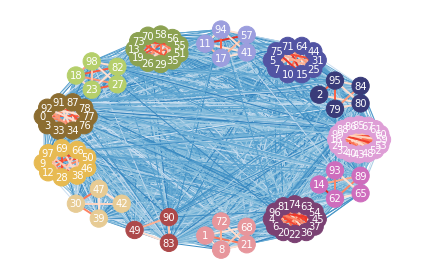

229015.43332933978

In [420]:
G = read_input(r'inputs/small150.in')
network_com_solve(G)
#fluid_comm(G)
visualize(G)
validate_output(G)
score(G)

#solve(G)
#score(G)


In [ ]:
# def fluid_comm(G):
#     best_graph = G
#     best_score = float('inf')
#     curr_copy = G.copy()
#     for num_teams in range(2, 30):
#         groups  = list(nx_comm.asyn_fluidc(curr_copy, num_teams))
#         print("NUM TEAMS: ", num_teams)
#         for node in G.nodes:
#             for group in groups:
#                 if node in group:
#                     curr_copy.nodes[node]['team'] = groups.index(group) + 1
#         if score(curr_copy) < best_score:
#             print("Old score: ", best_score, " New score: ", score(curr_copy))
#             best_graph = curr_copy.copy()
#             best_score = min(score(curr_copy), best_score)
        
#     for i in range(len(G.nodes)):
#         G.nodes[i]['team'] = int(best_graph.nodes[i]['team'])

        


In [427]:
run_all(network_com_solve, 'mediuminputs', 'outputs', overwrite=True)
tar('outputs', overwrite=True)

  0%|          | 1/260 [00:18<1:18:57, 18.29s/it]

mediuminputs\medium1.in: cost 1250052.8783596687


  1%|          | 2/260 [00:44<1:38:01, 22.79s/it]

mediuminputs\medium10.in: cost 10191883.476651829


  1%|          | 2/260 [00:56<2:01:46, 28.32s/it]


KeyboardInterrupt: 

In [ ]:
ours = read_input('large.in')
for i in range(1,261):
    other = read_input('inputs/large{}.in'.format(i))
    if nx.is_isomorphic(ours, other):
        print(i)
print("Done")


[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

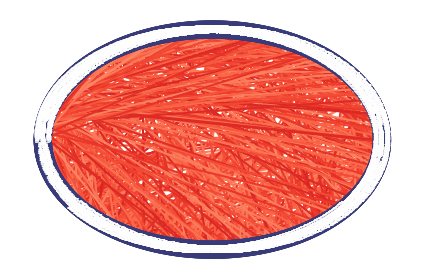

In [431]:
G = read_input('inputs/large15.in')
print(find_groups(G))
print(G[1][8]['weight'])
visualize(G)


In [ ]:
from networkx.algorithms import community
x = community.kernighan_lin.kernighan_lin_bisection(G)

def get_two_groups(G):
    return community.kernighan_lin.kernighan_lin_bisection(G)   

def kernighan_teams(G, num_teams):
    ret_groups = []
    depth = num_teams // 2
    while len(ret_groups) < num_teams:
        #TODO
        pass

def solve_kernighan_lin(G):
    best_graph = G.copy()
    best_score = float('inf')
    curr_copy = G.copy()
    for half_num_teams in range(1,20):
        groups = kernighan_teams(curr_copy,2 * half_num_teams)


        for node in curr_copy.nodes:
            for group in groups:
                if node in group:
                    curr_copy.nodes[node]['team'] = groups.index(group) + 1
                    break
        if score(curr_copy) < best_score:
            best_graph = curr_copy.copy()
            best_score = min(score(curr_copy), best_score)
        
    for i in range(len(G.nodes)):
        G.nodes[i]['team'] = int(best_graph.nodes[i]['team'])